<a href="https://colab.research.google.com/github/htihor/Image-classification/blob/main/Mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

In [2]:
datadir = '/content/drive/MyDrive/Images'
categories = ['Naruto uzumaki','Itachi uchiha','Kakashi hatake']
target = []
flat_data = []
image = []
for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    image.append(img_resize)
    target.append(class_num)
    
flat_data = np.array(flat_data)
target = np.array(target)
image = np.array(image)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3,random_state = 10)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid,refit=True) 
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 2])

In [6]:
y_test

array([1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2,
       0, 2])

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.8333333333333334

In [8]:
confusion_matrix(y_pred,y_test)

array([[7, 1, 1],
       [0, 8, 0],
       [1, 1, 5]])

In [9]:
import pickle
pickle.dump(clf,open('image_model.p','wb'))
model = pickle.load(open('image_model.p','rb'))

Enter the URLhttps://cdn.staticneo.com/w/naruto/Nprofile2.jpg
Predicted output = Naruto uzumaki


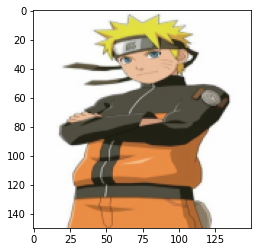

In [11]:
flat_data=[]
url = input("Enter the URL")
img = imread(url)
image_resized = resize(img,(150,150,3))
flat_data.append(image_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(image_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f"Predicted output = {y_out}")

In [12]:
!pip install streamlit==0.70.0
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 133kB 23.3MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.5
    Uninstalling urllib3-1.26.5:
      Successfully uninstalled urllib3-1.26.5


In [13]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classification using Machine Learning')
st.write('Upload image')
model = pickle.load(open('image_model.p','rb'))
uploaded_file = st.file_uploader("Select an image",type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption="Uploaded")
  if st.button("Predict"):
    categories = ['Naruto uzumaki','Itachi uchiha','Kakashi hatake']
    flat_data = []
    img = np.array(img)
    image_resized = resize(img,(150,150,3))
    flat_data.append(image_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = categories[y_out[0]]
    st.title(f"Predicted output = {y_out}")

Overwriting app.py


In [14]:
!nohup streamlit run app.py & 
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://4a67662083cc.ngrok.io'